# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of clain the been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 80 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 40 POINT for the preprocessing part by following the guide
- The Dashboard would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answers and the script for the dashboard to your github. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
import plotly.express as px

import re

In [344]:
data = pd.read_csv('tsa_claims_ujian.csv')

In [345]:
data.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [346]:
data.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [347]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Claim Number   51066 non-null  object
 1   Date Received  50996 non-null  object
 2   Incident Date  50496 non-null  object
 3   Airport Code   49014 non-null  object
 4   Airport Name   49014 non-null  object
 5   Airline Name   42511 non-null  object
 6   Claim Type     49106 non-null  object
 7   Claim Site     50876 non-null  object
 8   Item           50054 non-null  object
 9   Claim Amount   50074 non-null  object
 10  Status         51065 non-null  object
 11  Close Amount   33786 non-null  object
 12  Disposition    32846 non-null  object
dtypes: object(13)
memory usage: 5.1+ MB


In [348]:
data.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [349]:
temp = []

for i in data.columns:
    temp.append([i,
                 data[i].dtypes,
                 data[i].isna().sum(),
                 round(data[i].isna().sum()/len(data)*100, 2),
                 data[i].nunique(),
                 data[i].drop_duplicates().sample(2).values
                ])

pd.DataFrame(temp, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2009071661301, 2009112365571]"
1,Date Received,object,70,0.14,3522,"[27-Dec-12, 22-Sep-05]"
2,Incident Date,object,570,1.12,10788,"[6/14/2009 0:00, 12/19/2009 18:30]"
3,Airport Code,object,2052,4.02,405,"[SBA, BRD]"
4,Airport Name,object,2052,4.02,419,"[Clinton County Airport, Southeast Texas Regio..."
...,...,...,...,...,...,...
8,Item,object,1012,1.98,1854,[Cameras - Digital; Cell Phones; Computer - La...
9,Claim Amount,object,992,1.94,13248,"[$379.97 , $194.83 ]"
10,Status,object,1,0.00,13,"[In review, Approved]"
11,Close Amount,object,17280,33.84,6009,"[$254.27 , $30.03 ]"


If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object (np.nan) 

In [350]:
data.replace('-', np.nan, inplace = True)

Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [351]:
data['Date Received'] = pd.to_datetime(data['Date Received'])

In [352]:
idx = []
for i, item in enumerate(data['Incident Date']):
    try:
        pd.to_datetime(item)
    except ValueError:
        idx.append(i)

data.loc[idx]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31140,2008062646202,2008-06-23,29-JAN-0208 00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checked Baggage,Locks,$5.98,Denied,$0.00,Deny
31570,2008080548050,2008-07-31,30-JUL-0208 00:00,HOU,William P. Hobby,Continental Airlines,Passenger Property Loss,Checked Baggage,Locks,$16.00,Denied,$0.00,Deny
31590,2008081148331,2008-08-01,13-JUL-0200 00:00,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cosmetics - Perfume; toilet articles; medicine...,$40.00,Denied,$0.00,Deny
31771,2008081948782,2008-08-19,23-JUL-0208 00:00,FLL,Ft. Lauderdale-Hollywood International,Jet Blue,Passenger Property Loss,Checked Baggage,Computer - Laptop; GPS - Global Positioning Sy...,$3;379.00,Denied,$0.00,Deny


For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [353]:
replacement = data.loc[idx]['Date Received'].apply(lambda x: x.year)
date_month = data.loc[idx]['Incident Date'].apply(lambda x: x[:7])

temp = []
for dm, y in zip(date_month, replacement):
    temp.append(dm + '{}'.format(y))
    
data.loc[idx, 'Incident Date'] = temp

In [354]:
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [355]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Claim Number   51066 non-null  object        
 1   Date Received  50996 non-null  datetime64[ns]
 2   Incident Date  50496 non-null  datetime64[ns]
 3   Airport Code   48915 non-null  object        
 4   Airport Name   48915 non-null  object        
 5   Airline Name   41470 non-null  object        
 6   Claim Type     49035 non-null  object        
 7   Claim Site     50817 non-null  object        
 8   Item           48918 non-null  object        
 9   Claim Amount   46886 non-null  object        
 10  Status         47877 non-null  object        
 11  Close Amount   33786 non-null  object        
 12  Disposition    32846 non-null  object        
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [356]:
data.loc[idx]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31140,2008062646202,2008-06-23,2008-01-29,MIA,Miami International Airport,American Airlines,Property Damage,Checked Baggage,Locks,$5.98,Denied,$0.00,Deny
31570,2008080548050,2008-07-31,2008-07-30,HOU,William P. Hobby,Continental Airlines,Passenger Property Loss,Checked Baggage,Locks,$16.00,Denied,$0.00,Deny
31590,2008081148331,2008-08-01,2008-07-13,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cosmetics - Perfume; toilet articles; medicine...,$40.00,Denied,$0.00,Deny
31771,2008081948782,2008-08-19,2008-07-23,FLL,Ft. Lauderdale-Hollywood International,Jet Blue,Passenger Property Loss,Checked Baggage,Computer - Laptop; GPS - Global Positioning Sy...,$3;379.00,Denied,$0.00,Deny


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [357]:
pd.set_option('display.max_rows', 10)

In [358]:
data['Day Differences'] = data['Date Received'] - data['Incident Date']
data['Day Differences'] = data['Day Differences'].apply(lambda x: x.days)

Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

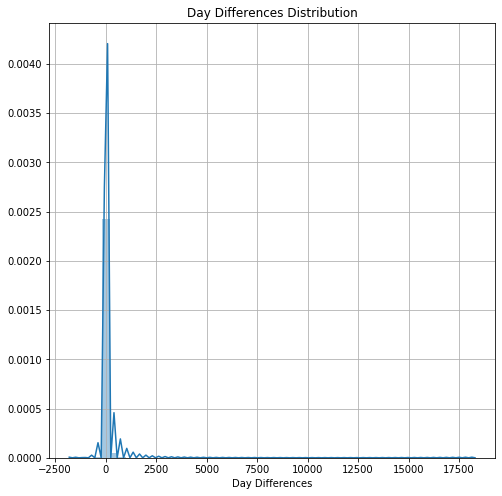

In [359]:
plt.figure(figsize = (8,8))
plt.title('Day Differences Distribution')
sns.distplot(data['Day Differences'].dropna())
plt.grid()

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

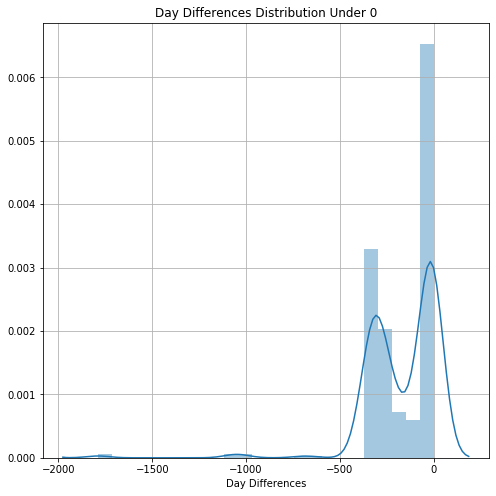

In [360]:
plt.figure(figsize = (8,8))
plt.title('Day Differences Distribution Under 0')
sns.distplot(data[data['Day Differences'] < 0]['Day Differences'])
plt.grid()

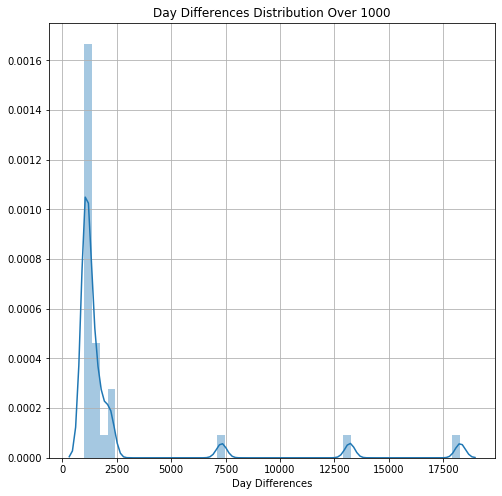

In [361]:
plt.figure(figsize = (8,8))
plt.title('Day Differences Distribution Over 1000')
sns.distplot(data[data['Day Differences'] > 1000]['Day Differences'])
plt.grid()

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

In [362]:
# see dates basic stats

data[['Date Received', 'Incident Date']].describe(exclude = 'number')

# ??? Date received last tahun 2055?
# 'The dataset includes claims filed between 2002 through 2015.' src: Context
# Incident date seems OK

,Date Received,Incident Date
count,50996,50496
unique,3522,10641
top,2004-05-27 00:00:00,2004-12-22 00:00:00
freq,182,43
first,2000-09-08 00:00:00,2000-01-01 00:00:00
last,2055-05-17 00:00:00,2015-12-29 00:00:00


In [363]:
data['Date Received'].drop_duplicates().sort_values(ascending = False)

# identified 3 false values (out of 50996 records, can be ignored?)
# max year should be 2015
# most probable reason is typo?

24272   2055-05-17
24271   2040-02-12
24270   2025-08-02
49752   2015-12-31
49205   2015-12-30
           ...    
2       2002-07-12
1       2002-06-20
0       2002-02-07
24276   2000-09-08
24280          NaT
Name: Date Received, Length: 3523, dtype: datetime64[ns]

In [364]:
# see day diff stats

data['Day Differences'].describe()

# 'In order to protect your rights under Federal law and to file a valid claim, 
# you must send your claim in writing to TSA, stating the
# circumstances of your loss and the exact amount you are claiming, within two (2) years of the incident.'
# src: TSA

# min - max range should be 0 - 730 days according to above guideline

# mean 42 days & median 23 days is still within 'normal' range

count    50460.000000
mean        41.768173
std        131.353407
min      -1789.000000
25%         12.000000
50%         23.000000
75%         45.000000
max      18279.000000
Name: Day Differences, dtype: float64

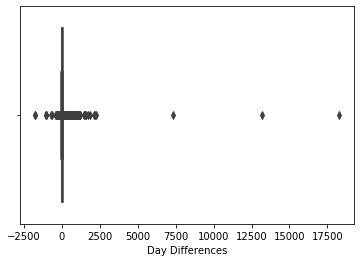

In [365]:
# coba visualisasi sebarannya

sns.boxplot(data['Day Differences'])

# nilai maxnya menarik datanya sangat jauh

In [366]:
# lihat stats diff < 0 saja

data[data['Day Differences'] < 0]['Day Differences'].describe()

# ada 448 record
# mean & median within -365 days diff
# max roughly -5 years???

count     448.000000
mean     -165.750000
std       199.907361
min     -1789.000000
25%      -303.250000
50%       -95.500000
75%       -10.000000
max        -1.000000
Name: Day Differences, dtype: float64

In [367]:
# lihat stats diff > 1000 saja

data[data['Day Differences'] > 1000]['Day Differences'].describe()

# 30 record
# max is skewing the mean

count       30.000000
mean      2488.933333
std       3839.660132
min       1002.000000
25%       1104.500000
50%       1129.500000
75%       1673.750000
max      18279.000000
Name: Day Differences, dtype: float64

In [368]:
# look at column values if any noticeable pattern

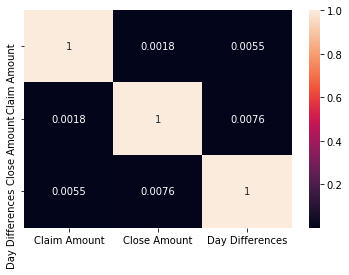

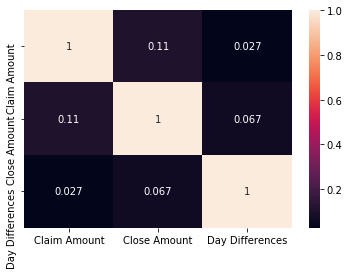

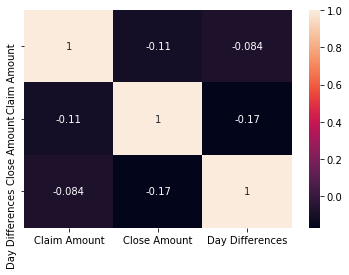

In [442]:
# numerical corr

sns.heatmap(data[['Claim Amount', 'Close Amount', 'Day Differences']].corr(), annot = True)
plt.show()
# no notable corr

sns.heatmap(day_0[['Claim Amount', 'Close Amount', 'Day Differences']].corr(), annot = True)
plt.show()
# claim amt weakly correlates to close amt

sns.heatmap(day_1000[['Claim Amount', 'Close Amount', 'Day Differences']].corr(), annot = True)
plt.show()
# claim amt, day diff weakly correlates to close amt

In [433]:
day_0 = data[data['Day Differences'] < 0]
day_1000 = data[data['Day Differences'] > 1000]

print(data['Airport Name'].value_counts().head())
print('')
print(day_0['Airport Name'].value_counts().head())
print('')
print(day_1000['Airport Name'].value_counts().head())

John F. Kennedy International           2286
Los Angeles International Airport       1813
Newark International Airport            1747
Chicago O'Hare International Airport    1712
Orlando International Airport           1633
Name: Airport Name, dtype: int64

Newark International Airport            21
Los Angeles International Airport       21
Miami International Airport             19
Chicago O'Hare International Airport    19
Phoenix Sky Harbor International        18
Name: Airport Name, dtype: int64

Hartsfield-Jackson Atlanta International Airport    3
John F. Kennedy International                       2
Seattle-Tacoma International                        2
Non TSA Airport (motor vehicle)                     2
McCarran International                              1
Name: Airport Name, dtype: int64


In [434]:
print(data['Airline Name'].value_counts().head())
print('')
print(day_0['Airline Name'].value_counts().head())
print('')
print(day_1000['Airline Name'].value_counts().head())

American Airlines       4377
Delta Air Lines         4371
UAL                     3507
Southwest Airlines      3258
Continental Airlines    2363
Name: Airline Name, dtype: int64

American Airlines       42
UAL                     38
Delta Air Lines         35
Continental Airlines    29
USAir                   25
Name: Airline Name, dtype: int64

Delta Air Lines         7
UAL                     5
Continental Airlines    2
American Airlines       2
Northwest Airlines      2
Name: Airline Name, dtype: int64


In [435]:
print(data['Claim Type'].value_counts().head())
print('')
print(day_0['Claim Type'].value_counts().head())
print('')
print(day_1000['Claim Type'].value_counts().head())

Passenger Property Loss    29713
Property Damage            18590
Personal Injury              394
Passenger Theft              115
Employee Loss (MPCECA)       114
Name: Claim Type, dtype: int64

Passenger Property Loss    249
Property Damage            169
Employee Loss (MPCECA)       5
Passenger Theft              3
Complaint                    1
Name: Claim Type, dtype: int64

Passenger Property Loss    14
Property Damage             9
Personal Injury             3
Passenger Theft             1
Motor Vehicle               1
Name: Claim Type, dtype: int64


In [436]:
print(data['Claim Site'].value_counts().head())
print('')
print(day_0['Claim Site'].value_counts().head())
print('')
print(day_1000['Claim Site'].value_counts().head())

Checked Baggage    39937
Checkpoint         10051
Other                695
Motor Vehicle        131
Bus Station            3
Name: Claim Site, dtype: int64

Checked Baggage    341
Checkpoint          95
Other                3
Name: Claim Site, dtype: int64

Checked Baggage    18
Checkpoint         10
Motor Vehicle       1
Other               1
Name: Claim Site, dtype: int64


In [437]:
print(data['Item'].value_counts().head())
print('')
print(day_0['Item'].value_counts().head())
print('')
print(day_1000['Item'].value_counts().head())

Other                                         9183
Luggage (all types including footlockers)     4818
Clothing - Shoes; belts; accessories; etc.    3761
Jewelry - Fine                                2488
Locks                                         2408
Name: Item, dtype: int64

Other                                         92
Luggage (all types including footlockers)     55
Clothing - Shoes; belts; accessories; etc.    42
Computer - Laptop                             29
Jewelry - Fine                                27
Name: Item, dtype: int64

Other                                         6
Clothing - Shoes; belts; accessories; etc.    4
Jewelry - Fine                                3
Luggage (all types including footlockers)     3
Currency                                      2
Name: Item, dtype: int64


In [374]:
print(data['Claim Amount'].value_counts().head(10))
print('')
print(day_0['Claim Amount'].value_counts().head(10))
print('')
print(day_1000['Claim Amount'].value_counts().head(10))

# day_1000 ada claim yang high value > $ 1000

$0.00       7065
$100.00      954
$50.00       859
$200.00      804
$150.00      761
$300.00      598
$250.00      534
$20.00       475
$500.00      451
$75.00       428
Name: Claim Amount, dtype: int64

$50.00        17
$0.00         17
$300.00       10
$200.00       10
$150.00        8
$80.00         8
$100.00        8
$30.00         6
$10.00         6
$1;000.00      5
Name: Claim Amount, dtype: int64

$100.00       2
$3;767.85     1
$800.00       1
$273.00       1
$249.99       1
$13.78        1
$5;015.00     1
$40.00        1
$190.00       1
$25.00        1
Name: Claim Amount, dtype: int64


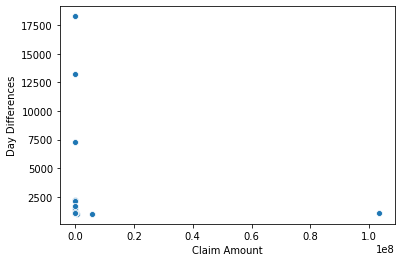

In [443]:
sns.scatterplot(day_1000['Claim Amount'], day_1000['Day Differences'])

# tapi high value emang cuman 2-3 aja

In [438]:
print(data['Status'].value_counts().head())
print('')
print(day_0['Status'].value_counts().head())
print('')
print(day_1000['Status'].value_counts().head())

Denied             17134
Approved            8724
Deny                7010
Settled             6970
Approve in Full     3165
Name: Status, dtype: int64

Denied      190
Approved     90
Settled      73
Canceled     21
Deny         16
Name: Status, dtype: int64

Denied                          12
Approved                         8
Settled                          3
Closed as a contractor claim     2
Canceled                         2
Name: Status, dtype: int64


In [ ]:
# setelah eksplor dengan feature2 lain tidak ada pola yang jelas menyebabkan fenomena day diff seperti demikian

# namun jika berangkat dari pengalaman kerja saya, kadang tgl dokumen yg tidak berkesinambungan dpt disebabkan:
# sesederhana salah input saja, human error (claim dikirim lewat pos ke TSA yg mungkin masih manual input)
# jumlah day_0 dan day_1000 = 478 record out of 51066 data asli
# ini juga akumulasi data dari 2002 - 2015, 13 tahun!
# mempertimbangkan volum claim yg TSA terima sangat besar, 40 error/tahun masih dapat diterima akal

# untuk diff > 1000 mungkin ada revisi claim, berulang2, sehingga data date yg diambil yg terakhir saja
# dan kalau berlarut2 tentu differencenya.
# batasan untuk submit adalah 2 tahun setelah incident.
# jika ditambah lagi hari yg terlewat untuk urusan setelahnya bisa jadi lebih lama lagi melewati 1000 hari?

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [376]:
data['Claim Amount'] = data['Claim Amount'].str.replace(r'[^0-9]+', '').astype('float64')
data['Close Amount'] = data['Close Amount'].str.replace(r'[^0-9]+', '').astype('float64')

Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [378]:
data['Amount Differences'] = data['Claim Amount'] - data['Close Amount']

In [379]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Claim Number        51066 non-null  object        
 1   Date Received       50996 non-null  datetime64[ns]
 2   Incident Date       50496 non-null  datetime64[ns]
 3   Airport Code        48915 non-null  object        
 4   Airport Name        48915 non-null  object        
 5   Airline Name        41470 non-null  object        
 6   Claim Type          49035 non-null  object        
 7   Claim Site          50817 non-null  object        
 8   Item                48918 non-null  object        
 9   Claim Amount        46886 non-null  float64       
 10  Status              47877 non-null  object        
 11  Close Amount        33786 non-null  float64       
 12  Disposition         32846 non-null  object        
 13  Day Differences     50460 non-null  float64   

In [380]:
data.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),5000.0,Approved,5000.0,Approve in Full,-333.0,0.0
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,227009.0,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),20000.0,Denied,0.0,Deny,42.0,20000.0
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,2144.0,Approved,2100.0,Approve in Full,40.0,44.0
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),183222.0,Canceled,0.0,NaN,10.0,183222.0


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

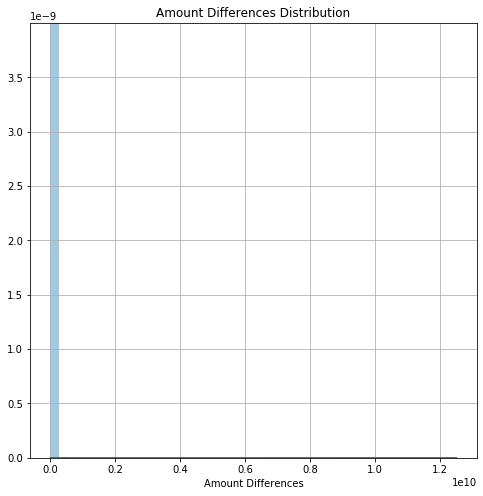

In [383]:
plt.figure(figsize = (8,8))
plt.title('Amount Differences Distribution')
sns.distplot(data['Amount Differences'].dropna())
plt.grid()

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [393]:
q1_amt = data['Amount Differences'].describe()['25%']
q3_amt = data['Amount Differences'].describe()['75%']
iqr_amt = q3_amt - q1_amt

out_amt = data[(data['Amount Differences'] < q1_amt - 1.5*iqr_amt) | (data['Amount Differences'] > q3_amt + 1.5*iqr_amt)]
out_amt

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
4,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),183222.0,Canceled,0.0,NaN,10.0,183222.0
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,200000.0,Denied,0.0,Deny,41.0,200000.0
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,200000.0,Settled,60000.0,Settle,33.0,140000.0
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,180199.0,Settled,29167.0,Settle,35.0,151032.0
27,21817,2002-10-29,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,750000.0,Denied,0.0,Deny,24.0,750000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36208,2009123167012,2009-12-29,2009-12-18 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checked Baggage,NaN,220000.0,Denied,0.0,Deny,11.0,220000.0
36210,2009123167017,2009-12-29,2009-12-02 15:30:00,JFK,John F. Kennedy International,KLM Royal Dutch Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Co...,90000.0,Denied,0.0,Deny,26.0,90000.0
36213,2010010867323,2009-12-29,2009-12-21 15:15:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,124000.0,Denied,0.0,Deny,7.0,124000.0
36225,2009123066912,2009-12-30,2009-12-15 00:00:00,GSO,Piedmont Triad International Airport,Delta Air Lines,Property Damage,Checked Baggage,NaN,230000.0,Denied,0.0,Deny,15.0,230000.0


In [394]:
out_amt['Claim Amount'].describe()

count    4.103000e+03
mean     4.164579e+06
std      1.954354e+08
min      8.510100e+04
25%      1.214375e+05
50%      1.821750e+05
75%      3.000000e+05
max      1.250000e+10
Name: Claim Amount, dtype: float64

In [395]:
out_amt['Close Amount'].describe()

count    4.103000e+03
mean     1.146136e+04
std      6.865218e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.000000e+06
Name: Close Amount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 

In [407]:
# "The claim must be SUM CERTAIN - This means that an exact U.S. Dollar Amount must be entered
# Purchase receipt of the ORIGINAL item lost or damaged.
# (If unavailable; credit card statements, bank statements, appraisals, etc.) "
# src: TSA

not_out_amt = data[~(data['Amount Differences'] < q1_amt - 1.5*iqr_amt) | (data['Amount Differences'] > q3_amt + 1.5*iqr_amt)]

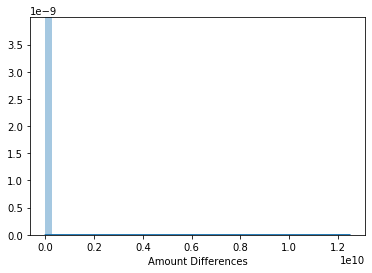

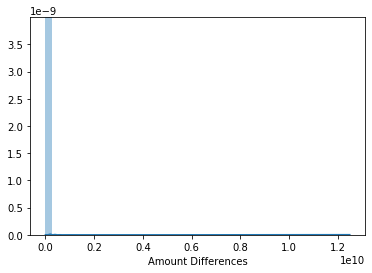

In [409]:
sns.distplot(not_out_amt['Amount Differences'].dropna())
plt.show()
sns.distplot(out_amt['Amount Differences'].dropna())
plt.show()

# skew

In [410]:
not_out_amt[['Claim Amount', 'Close Amount', 'Amount Differences']].describe()

# median $ 9,629

,Claim Amount,Close Amount,Amount Differences
count,4.688600e+04,3.378600e+04,3.347000e+04
mean,4.407323e+05,1.018412e+04,5.217843e+05
std,5.807553e+07,1.468609e+05,6.843299e+07
min,0.000000e+00,0.000000e+00,-4.311000e+04
25%,2.702250e+03,0.000000e+00,0.000000e+00
50%,1.135100e+04,0.000000e+00,9.629000e+03
75%,3.495775e+04,7.000000e+03,3.400000e+04
max,1.250000e+10,2.500000e+07,1.250000e+10


In [400]:
out_amt[['Claim Amount', 'Close Amount', 'Amount Differences']].describe()

# median $ 170,000 17x lebih besar daripada non outliers

,Claim Amount,Close Amount,Amount Differences
count,4.103000e+03,4.103000e+03,4.103000e+03
mean,4.164579e+06,1.146136e+04,4.153118e+06
std,1.954354e+08,6.865218e+04,1.954356e+08
min,8.510100e+04,0.000000e+00,8.510100e+04
25%,1.214375e+05,0.000000e+00,1.181440e+05
50%,1.821750e+05,0.000000e+00,1.700000e+05
75%,3.000000e+05,0.000000e+00,2.860625e+05
max,1.250000e+10,2.000000e+06,1.250000e+10


In [412]:
# check the status, assuming outliers contain outrageously large claims --> majority should be rejected by TSA
# compare

print(not_out_amt['Status'].value_counts().head())
print('')
print(out_amt['Status'].value_counts())

# turns out approved claims for outlier group is only 2 out of 4103 records wow

Denied             17134
Approved            8724
Deny                7010
Settled             6970
Approve in Full     3165
Name: Status, dtype: int64

Denied                          3450
Settled                          413
Canceled                         178
Closed as a contractor claim      60
Approved                           2
Name: Status, dtype: int64


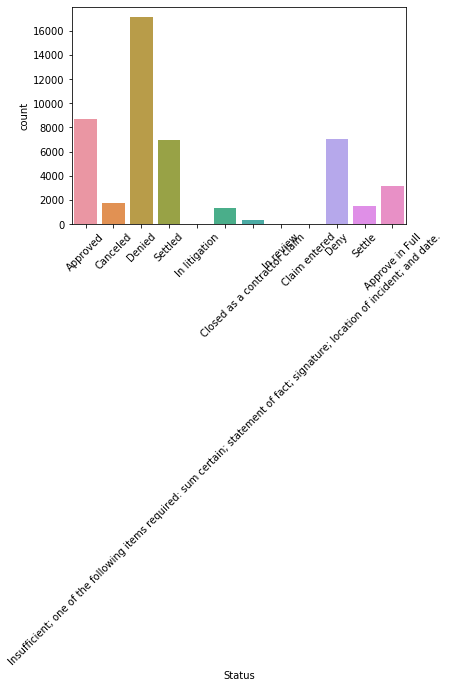

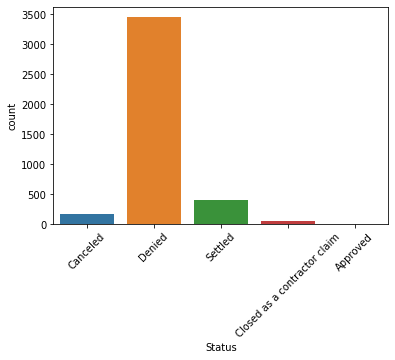

In [432]:
# coba visualisasi jumlah kasusnya

sns.countplot(not_out_amt['Status'])
plt.xticks(rotation = 45)
plt.show()

sns.countplot(out_amt['Status'])
plt.xticks(rotation = 45)
plt.show()

In [425]:
not_out_amt['Status'].value_counts()['Denied']/len(not_out_amt)*100

33.552657345396156

In [426]:
out_amt['Status'].value_counts()['Denied']/len(out_amt)*100

84.08481598830124

In [427]:
# Denied karena TSA merasa claimnya tidak valid
# pada group outlier yang denied JAUH lebih banyak daripada non-outlier

# pada guideline TSA juga disebutkan statement CC, mutasi bank, appraisal bisa menjadi reference claim amt
# sedangkan pasti sangat jarang amt yg disettle TSA mengikuti harga perolehan barang, krn pertimbangan depresiasi
# (barang secondhand dihargai di bawah harga belinya)

In [449]:
np.mean(out_amt['Claim Amount'] - out_amt['Close Amount'])

# secara kasar selisihnya sangat fantastis $ 4,153,118

4153117.6858396297

In [450]:
np.mean(not_out_amt['Claim Amount'] - not_out_amt['Close Amount'])

# dibandingkan non outlier, dia lebih besar hampir 8x!

521784.33400059753

## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

1. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

#### Jawab no 1

In [ ]:
# bisa dicari jumlah kasus tertinggi untuk identifikasi di airport mana/airline apa lebih probable
# mengalami musibah & harus claim ke TSA

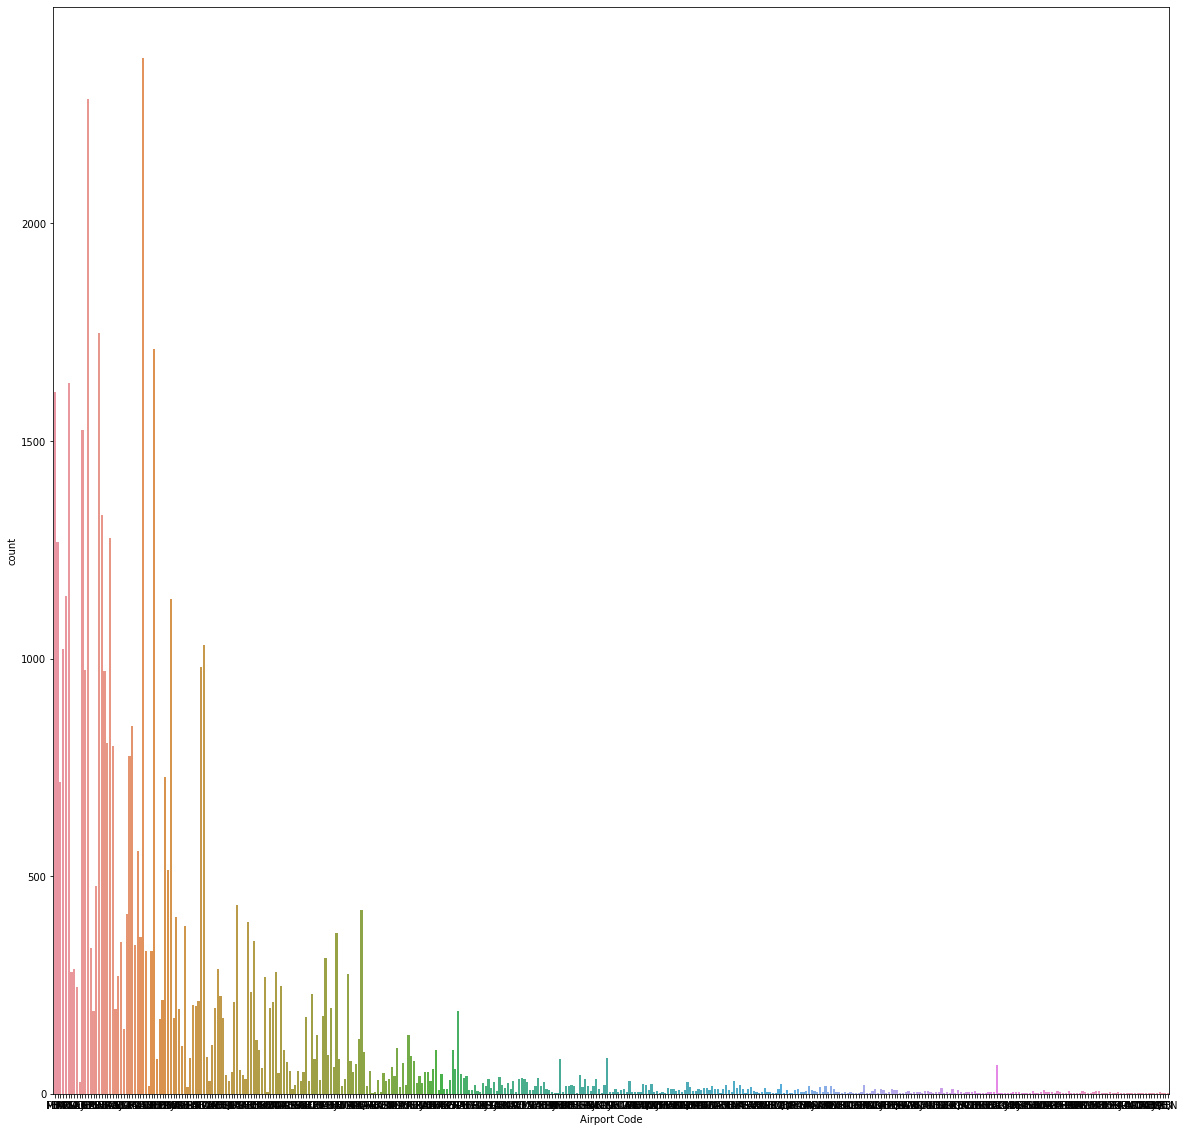

In [515]:
plt.figure(figsize = (20, 20))
sns.countplot(data['Airport Code'])

In [490]:
# cari top 10 airport by number of claims

data['Airport Code'].value_counts().head(10)

LAX    2379
JFK    2286
EWR    1747
ORD    1712
MCO    1633
MIA    1613
ATL    1525
SEA    1330
LAS    1278
PHX    1267
Name: Airport Code, dtype: int64

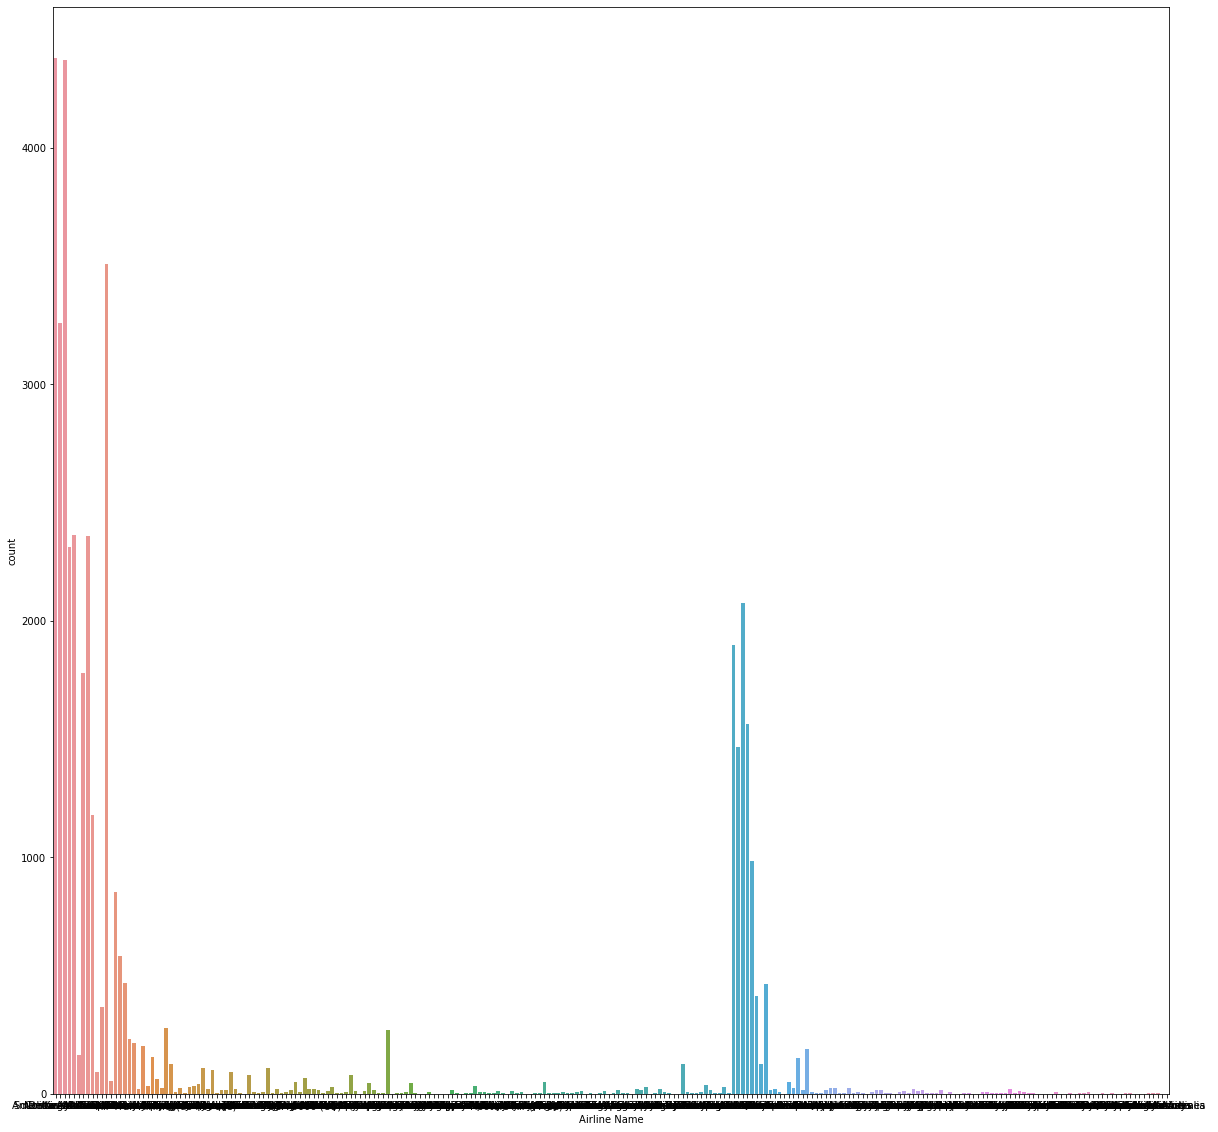

In [513]:
plt.figure(figsize = (20, 20))
sns.countplot(data['Airline Name'])

In [562]:
# cari top 10 airport by number of claims

data['Airline Name'].value_counts().head(10)

American Airlines       4377
Delta Air Lines         4371
UAL                     3507
Southwest Airlines      3258
Continental Airlines    2363
USAir                   2359
Northwest Airlines      2311
Delta Air Lines         2074
Southwest Airlines      1899
Jet Blue                1780
Name: Airline Name, dtype: int64

In [519]:
pd.pivot_table(data, index = 'Airport Code', aggfunc = 'count')

,Airline Name,Airport Name,Amount Differences,Claim Amount,Claim Number,Claim Site,Claim Type,Close Amount,Date Received,Day Differences,Disposition,Incident Date,Item,Status
Airport Code,,,,,,,,,,,,,,
ABE,25,31,22,30,31,31,30,22,31,31,22,31,28,30
ABI,8,11,5,8,11,11,10,5,11,11,5,11,11,8
ABQ,181,225,160,206,225,224,216,163,225,225,157,225,221,210
ABR,7,9,4,7,9,9,8,4,9,9,4,9,9,7
ABY,10,10,7,10,10,10,10,7,10,10,6,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YKM,11,11,4,8,11,11,11,4,11,11,4,11,10,8
YNG,4,4,1,3,4,4,4,1,4,4,1,4,4,3
YUM,7,7,0,6,7,7,7,0,7,7,0,7,6,6


In [559]:
data['Claim Type'].value_counts()

# menjelaskan jenis kerugian dipimpin dgn kehilangan/kerusakan brg pribadi

Passenger Property Loss    29713
Property Damage            18590
Personal Injury              394
Passenger Theft              115
Employee Loss (MPCECA)       114
Motor Vehicle                 96
Complaint                     13
Name: Claim Type, dtype: int64

In [485]:
data[data['Claim Type'].isna()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),20000.0,Denied,0.0,Deny,42.0,20000.0
6,18202,2002-09-16,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,NaN,Checkpoint,Computer - Laptop,67800.0,Approved,67800.0,Approve in Full,35.0,0.0
7,16961,2002-09-18,2002-08-05,NaN,NaN,Delta Air Lines,NaN,Checked Baggage,Other,17500.0,Settled,17199.0,Settle,44.0,301.0
8,18394,2002-09-20,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Other,15000.0,Denied,0.0,Deny,39.0,15000.0
11,0616760L,2002-09-26,NaT,NaN,NaN,NaN,NaN,Other,Locks,NaN,Insufficient; one of the following items requi...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49785,2015011519916,2015-01-15,2014-11-24,JFK,John F. Kennedy International,American Airlines,NaN,Checked Baggage,Personal Accessories,NaN,NaN,NaN,NaN,52.0,NaN
50526,2015111826966,2015-11-18,2015-10-25,ORD,Chicago O'Hare International Airport,LOT Polish Airlines,NaN,Checked Baggage,Personal Electronics,NaN,NaN,NaN,NaN,24.0,NaN
50915,2015092825664,2015-09-11,2015-06-02,SJU,Luis Munoz Marin International,NaN,NaN,NaN,Personal Accessories,NaN,NaN,NaN,NaN,101.0,NaN
50931,2015081924982,2015-08-17,2015-06-28,SLC,Salt Lake City International Airport,USAir,NaN,Checkpoint,Personal Accessories,NaN,NaN,NaN,NaN,50.0,NaN


In [476]:
# cek claim type NaN, 2031 record

data[data['Claim Type'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2031 entries, 2 to 51059
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Claim Number        2031 non-null   object        
 1   Date Received       1996 non-null   datetime64[ns]
 2   Incident Date       1649 non-null   datetime64[ns]
 3   Airport Code        1484 non-null   object        
 4   Airport Name        1484 non-null   object        
 5   Airline Name        1028 non-null   object        
 6   Claim Type          0 non-null      object        
 7   Claim Site          1901 non-null   object        
 8   Item                1877 non-null   object        
 9   Claim Amount        1558 non-null   float64       
 10  Status              1979 non-null   object        
 11  Close Amount        1535 non-null   float64       
 12  Disposition         1460 non-null   object        
 13  Day Differences     1647 non-null   float64    

In [481]:
data[data['Claim Type'].isna()].isna().sum().sort_values(ascending = False).head(10)

# nah claim type yg kosong biasanya disertai dengan 
# airline name, dispotition, airport name, airport code, amounts, incident date juga kosong (tidak lengkap)
# yang status, claim amt nya kosong apalagi bisa dipertimbangkan utk didrop krn tidak useful

Claim Type            2031
Airline Name          1003
Amount Differences     688
Disposition            571
Airport Name           547
Airport Code           547
Close Amount           496
Claim Amount           473
Day Differences        384
Incident Date          382
dtype: int64

In [487]:
data[data['Claim Type'].isna()]['Item'].value_counts().head(10)

Other                                                           563
Luggage (all types including footlockers)                       268
Clothing - Shoes; belts; accessories; etc.                      257
Jewelry - Fine                                                  192
Cameras - Digital                                               145
Locks                                                            83
Eyeglasses - (including contact lenses)                          62
Computer - Laptop                                                60
Cosmetics - Perfume; toilet articles; medicines; soaps; etc.     53
Currency                                                         44
Name: Item, dtype: int64

In [484]:
data[data['Claim Type'].isna()]['Status'].value_counts()

# banyak yg dideny

Denied                                                                                                                           519
Settled                                                                                                                          514
Approved                                                                                                                         427
Canceled                                                                                                                         285
Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.    206
Deny                                                                                                                              11
Closed as a contractor claim                                                                                                       6
Settle                                                               

In [504]:
import scipy.stats as ss

#Correlation measurement untuk data discrete dan continuous
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

#Correlation measurement untuk data discrete dan discrete
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [553]:
# untuk bisa dites statistik harus bersihin NA

cln = data[['Airport Code', 'Airline Name', 'Claim Amount']].dropna(how = 'any')
cln

,Airport Code,Airline Name,Claim Amount
0,MIA,American Airlines,5000.0
2,BWI,American Airlines,20000.0
3,BWI,Southwest Airlines,2144.0
8,BWI,Southwest Airlines,15000.0
9,PHL,Delta Air Lines,5000000.0
...,...,...,...
51033,TYS,Delta Air Lines,2500.0
51034,TYS,Delta Air Lines,0.0
51036,YKM,American Airlines,18999.0
51037,YNG,Allegiant Air,10600.0


In [554]:
correlation_ratio(cln['Airport Code'], cln['Claim Amount'])

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [555]:
correlation_ratio(cln['Airline Name'], cln['Claim Amount'])

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

#### Jawab no 2

In [520]:
data['Status'].unique()

array(['Approved', 'Canceled', 'Denied', 'Settled', 'In litigation',
       'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.',
       'Closed as a contractor claim', 'In review', 'Claim entered',
       'Deny', nan, 'Settle', 'Approve in Full'], dtype=object)

In [521]:
data['Disposition'].unique()

# seharusnya kol ini sbg follow up dari status

array(['Approve in Full', nan, 'Deny', 'Settle'], dtype=object)

In [528]:
# secara logika harusnya Approved followed by Approved in Full

data[data['Status'] == 'Approved']['Disposition'].value_counts()

# betul

Approve in Full    8724
Name: Disposition, dtype: int64

In [530]:
# secara logika harusnya Denied followed by Deny

data[data['Status'] == 'Denied']['Disposition'].value_counts()

#betul

Deny    17125
Name: Disposition, dtype: int64

In [532]:
# secara logika harusnya Settled followed by Settle

data[data['Status'] == 'Settled']['Disposition'].value_counts()

# betul

Settle    6970
Name: Disposition, dtype: int64

In [537]:
# lihat sisanya

data[data['Disposition'].isna()]['Status'].value_counts()

Deny                                                                                                                             7010
Approve in Full                                                                                                                  3165
Canceled                                                                                                                         1703
Settle                                                                                                                           1453
Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.    1352
Closed as a contractor claim                                                                                                      326
Denied                                                                                                                              9
In litigation                                                 

In [539]:
# discrete-discrete corr

cramers_v(data['Status'], data['Disposition'])

# secara statistik
# almost 1 -- 99.9% association between status & dispositon as expected

0.9997805219577847

In [566]:
# menurut TSA 'The claim must have a SPECIFIC DATE'
# besar kemungkinan claim invalid & lgsg deny jika kosong

cramers_v(data['Status'], data['Incident Date'])

#secara statistik ada weak association

0.2790600100748736

In [569]:
# dari nomor 1 diketahui kasus banyak terjadi di airport tertentu

cramers_v(data['Status'], data['Airport Code'])

# secara statistik ada weak association 

0.2806334947102198

In [570]:
cramers_v(data['Status'], data['Item'])

# ternyata ada weak association 

0.30130603622286906

In [ ]:
# apakah ada item yg cenderung diapprove/deny/settle?

# dari detail di bawah ini kurang terlihat krn komposisi mirip at a glance

In [577]:
data[data['Status'] == 'Denied']['Item'].value_counts().head(3)

Other                                         2801
Luggage (all types including footlockers)     1873
Clothing - Shoes; belts; accessories; etc.    1349
Name: Item, dtype: int64

In [578]:
data[data['Status'] == 'Approved']['Item'].value_counts().head(3)

Other                                         2428
Clothing - Shoes; belts; accessories; etc.    1324
Luggage (all types including footlockers)     1212
Name: Item, dtype: int64

In [579]:
data[data['Status'] == 'Settled']['Item'].value_counts().head(3)

Other                                         1479
Luggage (all types including footlockers)     1347
Clothing - Shoes; belts; accessories; etc.     723
Name: Item, dtype: int64

## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data

To create our dashboard, lets use only the data that was not outlier according to the Amount Differences. As we did not process all the NaN, just drop all those NaN. Save the file as 'tsa_claims_dashboard_ujian.csv', don't include the Index. As we don't want to have too much data in our dashboard, let's just sample 1000 data from our current data.

Also, set the random seed to 101.

In [591]:
not_out_amt.dropna(how = 'any').to_csv('tsa_claims_dashboard_ujian.csv', index = 'False')

In [592]:
np.random.seed(101)

In [597]:
export = not_out_amt.dropna(how = 'any').sample(1000)
export

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
16826,2005071288719,2005-07-11,2005-05-24,MEM,Memphis International Airport,Northwest Airlines,Passenger Property Loss,Checkpoint,Cameras - Digital,4369.0,Approved,4369.0,Approve in Full,48.0,0.0
12866,2005010372379,2004-12-13,2004-11-14,PHL,Philadelphia International Airport,USAir,Passenger Property Loss,Checked Baggage,Eyeglasses - (including contact lenses),74000.0,Denied,0.0,Deny,29.0,74000.0
20215,2006022402153,2006-02-21,2006-01-12,LAX,Los Angeles International Airport,Delta Air Lines,Property Damage,Checkpoint,Other,5000.0,Approved,5000.0,Approve in Full,40.0,0.0
12887,2005010472510,2004-12-14,2004-10-04,CRP,Corpus Christi International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,3500.0,Approved,3500.0,Approve in Full,71.0,0.0
8860,2004061055451,2004-05-27,2004-03-13,CLT,Charlotte/Douglas International Airport,USAir,Passenger Property Loss,Checked Baggage,Luggage (all types including footlockers),750.0,Approved,750.0,Approve in Full,75.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21899,2006062908743,2006-06-27,2006-05-20,GRR,Gerald R. Ford International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Cameras - Digital,45191.0,Denied,0.0,Deny,38.0,45191.0
12660,2004123071915,2004-12-01,2004-10-10,LAS,McCarran International,American Airlines,Passenger Property Loss,Checked Baggage,Currency,3850.0,Approved,3850.0,Approve in Full,52.0,0.0
34279,2009052659448,2009-05-19,2009-05-16,DEN,Denver International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Costume,10000.0,Denied,0.0,Deny,3.0,10000.0
7513,0312011M,2004-03-12,2003-12-23,MHT,Manchester Regional Airport,Southwest Airlines,Property Damage,Checked Baggage,Other,7632.0,Denied,0.0,Deny,80.0,7632.0


Export the data to your SQL database, and try to connect the database to the dashboard

In [590]:
import mysql.connector
conn = mysql.connector.connect(host = 'localhost',
                               user = 'root',
                               passwd = 'password'
                              )
cursor = conn.cursor(dictionary = True)
# cursor.execute('SELECT * FROM toko.toko')
# result = cursor.fetchall()
# df = pd.DataFrame(result)

In [599]:
cols = "`,`".join([str(i) for i in export.columns.tolist()])

In [606]:
for i, row in export.iterrows():
    sql = "INSERT INTO claim.claim (`" +cols + "`) VALUES (" + "%s,"*(len(row)-1) + "%s)"
    cursor.execute(sql, tuple(row))

ProgrammingError: Failed processing format-parameters; Python 'timestamp' cannot be converted to a MySQL type

In [ ]:
cursor.execute('SELECT * FROM toko.toko')
result = cursor.fetchall()